# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.226733,0.010542,0.351673,0.238194,0.055225,0.325239,0.240435,0.057239,0.324510
1,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.242829,0.015836,0.359734,0.266882,0.080544,0.325173,0.270462,0.083603,0.323833
2,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,0.260508,0.032736,0.339536,0.296430,0.131213,0.279790,0.301305,0.135507,0.277920
3,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.260519,0.032744,0.339554,0.298287,0.132804,0.281202,0.303842,0.138038,0.278911
4,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0.165668,0.091730,0.200208,0.268626,0.236109,0.128800,0.275338,0.237406,0.128180


# Explore best partition per k

In [8]:
_col0, _col1 = "ami_mean", "ami_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ami_mean,ami_median
k,,,,,
11,304,scc_020,11,0.301837,0.135451
10,303,scc_020,10,0.301736,0.134304
9,302,scc_020,9,0.301299,0.133668
8,301,scc_020,8,0.300169,0.133086
7,300,scc_020,7,0.299448,0.131352
13,306,scc_020,13,0.298894,0.142181
5,3,eac_average_coassoc_matrix,5,0.298287,0.132804
4,2,eac_average_coassoc_matrix,4,0.296430,0.131213
18,311,scc_020,18,0.294079,0.160420


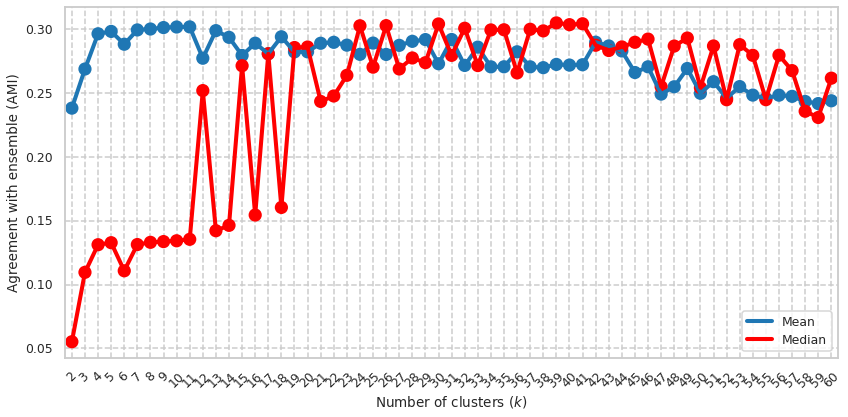

In [9]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

# Select best partition per k

In [10]:
_measure_col = "ami_mean"
best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [11]:
best_parts = best_parts.set_index("k")

In [12]:
best_parts.shape

(59, 3)

In [13]:
# show partitions with top ARI
best_parts.head(10)

,method,partition,ami_mean
k,,,
11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448
13,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298894
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298287
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.296430
18,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.294079


In [14]:
best_parts.sort_values("k")

,method,partition,ami_mean
k,,,
2,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.238194
3,eac_complete_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.268836
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.296430
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298287
6,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.288249
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a specified threshold (median).

In [15]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    59.000000
mean      0.275590
std       0.018332
min       0.238194
25%       0.267466
50%       0.280252
75%       0.289450
max       0.301837
Name: ami_mean, dtype: float64

In [16]:
best_threshold = best_parts_stats["50%"]
best_threshold_description = "Median"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x > best_threshold)
)

0.280252114619655

In [17]:
best_parts.shape

(59, 4)

In [18]:
best_parts.head()

,method,partition,ami_mean,selected
k,,,,
11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837,True
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736,True
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299,True
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169,True
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448,True


## Save best partitions per k

In [19]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [20]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [21]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ami_mean,selected
0,11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837,True
1,10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736,True
2,9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299,True
3,8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169,True
4,7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448,True


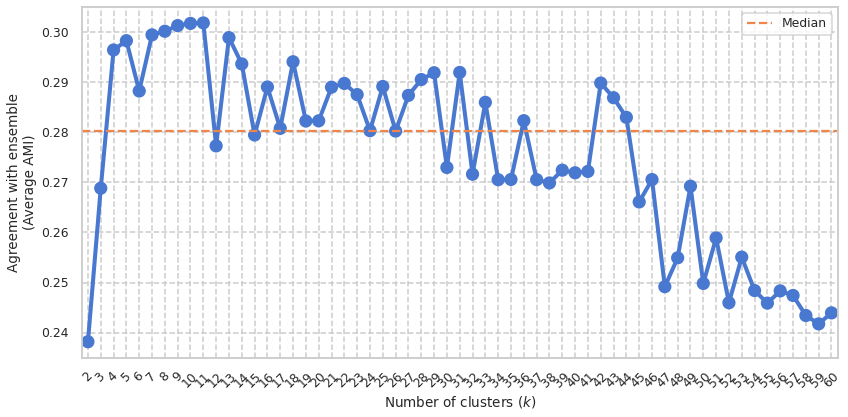

In [22]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel("Agreement with ensemble\n(Average AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average AMI; partitions above that line are marked as selected for downstream analysis

In [23]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ami_mean,selected
7,4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.296430,True
6,5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298287,True
18,6,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.288249,True
4,7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448,True
3,8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169,True
2,9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299,True
1,10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736,True
0,11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837,True
5,13,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298894,True
9,14,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293653,True


Evidence accumulation approaches (EAC) based on hierarchical clustering (such as `eac_average_coassoc_matrix` and `eac_single_coassoc_matrix`) pick the best partitions for lower `k` values, whereas spectral clustering does it better for all the rest.